In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import log
from sklearn import linear_model


In [4]:
df = pd.read_csv("Assignment2_data.data" , sep = '\t')

In [5]:
df

,SpringPos,StockPrice
0,2.27,3.48
1,6.38,2.99
2,8.61,5.86
3,8.65,1.79
4,13.17,3.47
...,...,...
221,1.37,25.14
222,2.29,22.65
223,1.80,21.04
224,0.82,20.98


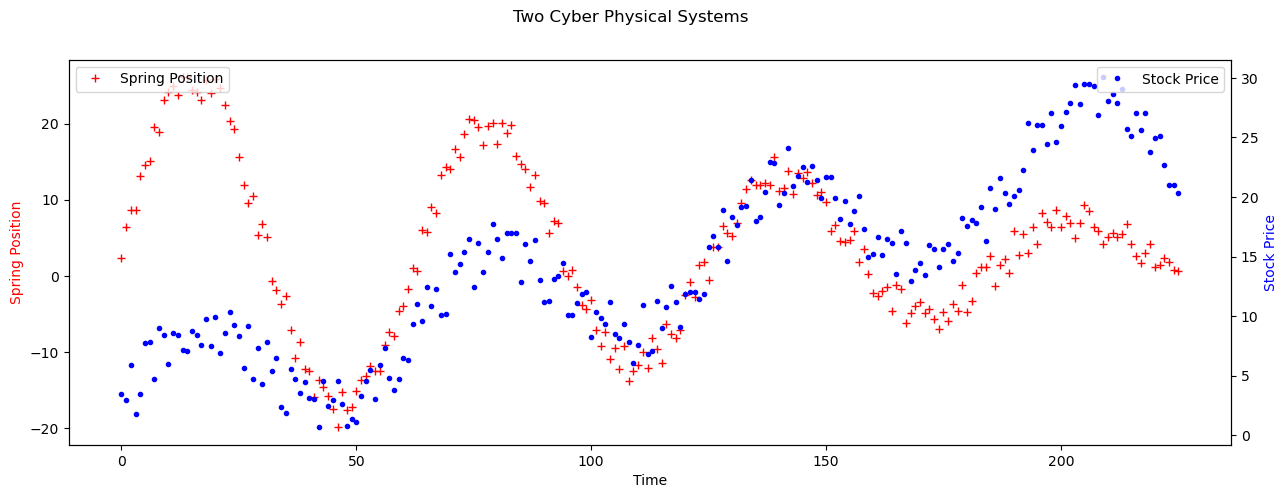

In [6]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

ax1.plot(df.index, df.SpringPos, 'r+', label='Spring Position')
ax1.set_ylabel('Spring Position', color='r')
ax1.set_xlabel('Time')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(df.index, df.StockPrice, 'b.', label='Stock Price')
ax2.set_ylabel('Stock Price', color='b')
ax2.legend(loc='upper right')

fig.suptitle('Two Cyber Physical Systems')

plt.show()

# Task-1

In [7]:
y2 = pd.DataFrame({"x":range(226), "y":df.SpringPos})
y2.head()

,x,y
0,0,2.27
1,1,6.38
2,2,8.61
3,3,8.65
4,4,13.17


In [8]:
col1 = y2.x
print(col1.head())
print(col1.shape)   #(226,) # implies 226 element in one single array.

0    0
1    1
2    2
3    3
4    4
Name: x, dtype: int64
(226,)


In [9]:
col2 = y2.y
print(col2.head())
print(col2.shape)   #(226,) # implies 226 element in one single array.

0     2.27
1     6.38
2     8.61
3     8.65
4    13.17
Name: y, dtype: float64
(226,)


In [10]:
y = np.array(col2) 
X = np.expand_dims(col1, 1)
print(X.shape)  # here we see that with every elemt of col1 , we add 1 .
print(y.shape)  

(226, 1)
(226,)


Implement the OLS closed form solution using numpy’s matrix operators to find the value 
of ‘m’ that minimizes SSE

In [11]:
def estimateBeta(X, y):
    numerator = np.matmul(np.transpose(X), y)
    denom = np.matmul(np.transpose(X), X)
    denom_inv = np.linalg.inv(denom)
    beta = np.matmul(denom_inv, numerator)
    print(type(beta))
    return beta

def predict(beta, X):
    if len(X.shape) != 2:   # here it implies that x can't be 2D.
        X = np.expand_dims(X,1)
    beta = np.array(beta)
    return np.matmul(X, beta)

def SSE(y, yhat):
    return np.sum((y-yhat)**2)

In [12]:
beta = estimateBeta(X,y)
print("beta =", beta)
yhat = predict(beta,X)
loss = SSE(y, yhat)
print("SSE =", loss)

<class 'numpy.ndarray'>
beta = [0.01832175]
SSE = 27738.298279267474


In [13]:
beta[0] # slope

0.018321754998724567

Text(0.5, 0, 'Time')

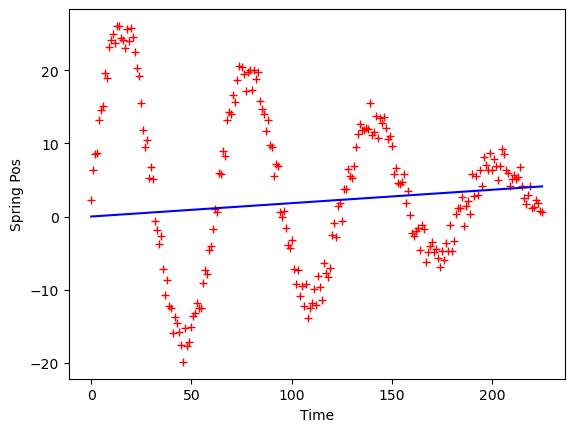

In [14]:
plt.plot(y2.x, y2.y, 'r+')
plt.plot(y2.x, yhat, 'b-')  # yhat = y2.x*beta[0]
plt.ylabel('Spring Pos')
plt.xlabel('Time')

Implement a linear search (the single parameter search version of grid search) for m = tan θ, 
where θ in [0, 60] in steps of 5 degrees and measure the SSE at every choice of θ.  Create a 
plot that shows SSE vs θ.  Report the θ, that minimizes SSE.

Theta is: 0, SSE is: 26891.848400000003
Theta is: 5, SSE is: 70587.32797577733
Theta is: 10, SSE is: 174830.47683073598
Theta is: 15, SSE is: 345537.66094581445
Theta is: 20, SSE is: 593308.2919524446
Theta is: 25, SSE is: 934966.8142894885
Theta is: 30, SSE is: 1396252.8869381258
Theta is: 35, SSE is: 2016455.2580184313
Theta is: 40, SSE is: 2856560.5557003273
Theta is: 45, SSE is: 4014157.1083999993
Theta is: 50, SSE is: 5652195.995931142
Theta is: 55, SSE is: 8058429.597120416
Theta is: 60, SSE is: 11779424.964014366


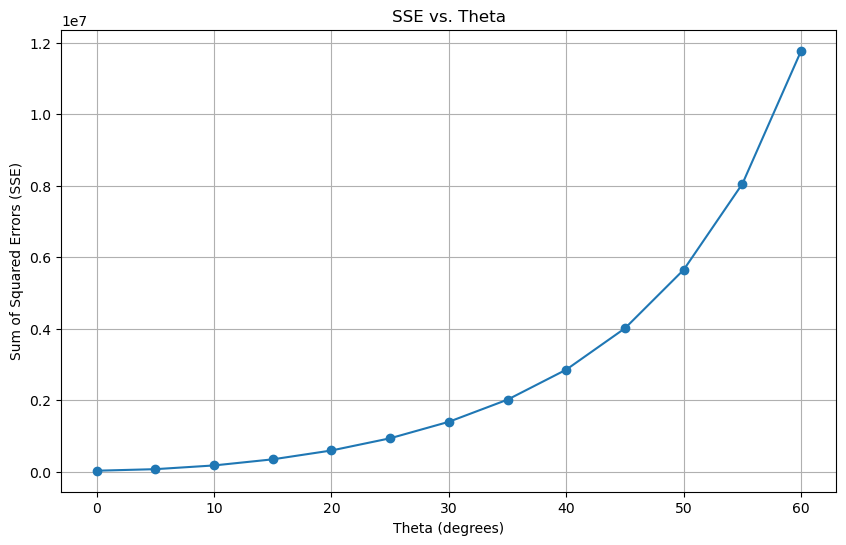

<class 'list'>
Theta that minimizes SSE: 0 degrees
Minimal SSE: 26891.848400000003


In [15]:
c = 6
def compute_sse(m, c, X, y):
    X = np.ravel(X)
    y_pred = m * X + c
    sse = np.sum((y - y_pred) ** 2)
    return sse
theta_values = np.arange(0, 65, 5)
sse_values = []

for theta in theta_values:
    m = np.tan(np.radians(theta))
    sse = compute_sse(m, c, X, y)
    print(f"Theta is: {theta}, SSE is: {sse}")
    sse_values.append(sse)

plt.figure(figsize=(10, 6))
plt.plot(theta_values, sse_values, marker='o')
plt.xlabel('Theta (degrees)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE vs. Theta')
plt.grid(True)
plt.show()

print(type(sse_values))

min_sse_index = np.argmin(sse_values)  
optimal_theta = theta_values[min_sse_index]
optimal_sse = sse_values[min_sse_index]

print(f'Theta that minimizes SSE: {optimal_theta} degrees')
print(f'Minimal SSE: {optimal_sse}')

Implement the solution using sklearn’s LinearRegression class.

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X,y)

LinearRegression()

In [19]:
m = lr.coef_

In [20]:
m

array([-0.02724716])

In [21]:
c = lr.intercept_

In [22]:
def compute_sse(m, c, X, y):
    X = np.ravel(X)
    y_pred = m * X + c
    sse = np.sum((y - y_pred) ** 2)  
    return sse

In [23]:
compute_sse(m , c, X, y)

25069.131971939343

Compare the estimated ‘m’ values through the above three methods and justify the 
differences if there are. 

# here we are comparing the slope for m = tan(theta) , for Gradient Descent and OLS
# for OLS that give the accurate value of slope with the minimum sse value i.e 25069 and slope is -0.02724716
# for m = tan(theta) we got the sse to be minimum at near around 0.
# for Linear Regression to be slope at 0.01832175.

# Task- 2

In [24]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X ,y , test_size = 0.2 , random_state = 0)
train_size = 0.6
data_len = len(X)
train_end = int(data_len * train_size)
X_train_extra, y_train_extra = X[:train_end], y[:train_end]
X_test_extra, y_test_extra = X[train_end:], y[train_end:]

In [25]:
lr2 = LinearRegression()

In [26]:
lr2.fit(X_train , y_train)

LinearRegression()

In [27]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred=lr.predict(X_test)

In [29]:
np.sum((y_test- y_pred)**2)

5257.4435166724925

## Let's add an intercept (bias) to the data and check if the SSE drops further.

In [30]:
df['Bias']=np.ones(226)

In [31]:
df

,SpringPos,StockPrice,Bias
0,2.27,3.48,1.0
1,6.38,2.99,1.0
2,8.61,5.86,1.0
3,8.65,1.79,1.0
4,13.17,3.47,1.0
...,...,...,...
221,1.37,25.14,1.0
222,2.29,22.65,1.0
223,1.80,21.04,1.0
224,0.82,20.98,1.0


In [32]:
df= df.drop('StockPrice',axis=1)

In [33]:
df

,SpringPos,Bias
0,2.27,1.0
1,6.38,1.0
2,8.61,1.0
3,8.65,1.0
4,13.17,1.0
...,...,...
221,1.37,1.0
222,2.29,1.0
223,1.80,1.0
224,0.82,1.0


In [34]:
df['Time']= df.index

In [35]:
df = df[['Bias','Time','SpringPos']]   # to reorder.

In [36]:
df

,Bias,Time,SpringPos
0,1.0,0,2.27
1,1.0,1,6.38
2,1.0,2,8.61
3,1.0,3,8.65
4,1.0,4,13.17
...,...,...,...
221,1.0,221,1.37
222,1.0,222,2.29
223,1.0,223,1.80
224,1.0,224,0.82


In [37]:
X = df[["Bias","Time"]].values
y = df[['SpringPos']].values

In [38]:
beta = estimateBeta(X,y)
print("beta =", beta)
yhat = predict(beta,X)
loss = SSE(y, yhat)
print("SSE =", loss)

<class 'numpy.ndarray'>
beta = [[ 6.8505263 ]
 [-0.02724716]]
SSE = 25069.131971939343


In [39]:
beta[0]   # intercept

array([6.8505263])

In [40]:
beta[1]   # slope

array([-0.02724716])

Text(0.5, 0, 'Time')

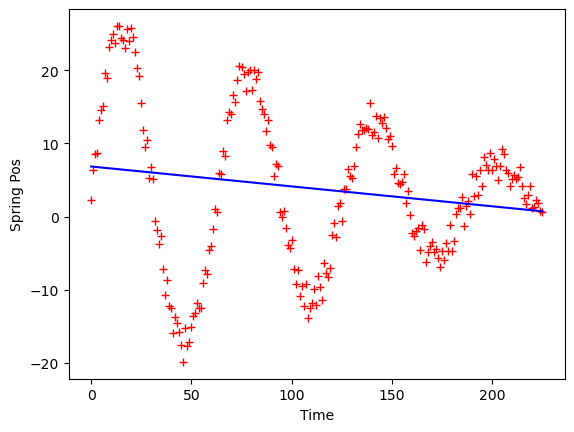

In [41]:
plt.plot(y2.x, y2.y, 'r+')
plt.plot(y2.x, yhat, 'b-')  # yhat = y2.x*beta[0]
plt.ylabel('Spring Pos')
plt.xlabel('Time')

# Updating the datafrme

In [42]:
df['x1']=round(df.Time*beta[1],2)

C:\Users\DELL\AppData\Local\Temp\ipykernel_28488\241091333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x1']=round(df.Time*beta[1],2)


In [43]:
df

,Bias,Time,SpringPos,x1
0,1.0,0,2.27,-0.00
1,1.0,1,6.38,-0.03
2,1.0,2,8.61,-0.05
3,1.0,3,8.65,-0.08
4,1.0,4,13.17,-0.11
...,...,...,...,...
221,1.0,221,1.37,-6.02
222,1.0,222,2.29,-6.05
223,1.0,223,1.80,-6.08
224,1.0,224,0.82,-6.10


In [44]:
df['x2'] = np.sin(df['x1'])   #including the sine term 

C:\Users\DELL\AppData\Local\Temp\ipykernel_28488\3247418727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x2'] = np.sin(df['x1'])   #including the sine term


In [45]:
df

,Bias,Time,SpringPos,x1,x2
0,1.0,0,2.27,-0.00,-0.000000
1,1.0,1,6.38,-0.03,-0.029996
2,1.0,2,8.61,-0.05,-0.049979
3,1.0,3,8.65,-0.08,-0.079915
4,1.0,4,13.17,-0.11,-0.109778
...,...,...,...,...,...
221,1.0,221,1.37,-6.02,0.260157
222,1.0,222,2.29,-6.05,0.231078
223,1.0,223,1.80,-6.08,0.201790
224,1.0,224,0.82,-6.10,0.182163


In [46]:
df = df[['Bias','Time','x1','x2','SpringPos']]  # reorder

In [47]:
df

,Bias,Time,x1,x2,SpringPos
0,1.0,0,-0.00,-0.000000,2.27
1,1.0,1,-0.03,-0.029996,6.38
2,1.0,2,-0.05,-0.049979,8.61
3,1.0,3,-0.08,-0.079915,8.65
4,1.0,4,-0.11,-0.109778,13.17
...,...,...,...,...,...
221,1.0,221,-6.02,0.260157,1.37
222,1.0,222,-6.05,0.231078,2.29
223,1.0,223,-6.08,0.201790,1.80
224,1.0,224,-6.10,0.182163,0.82


In [48]:
X = df[['Bias', 'x1', 'x2']].values
y = df[['SpringPos']].values

In [49]:
beta = estimateBeta(X,y)
print("beta =", beta)
yhat = predict(beta,X)
loss = SSE(y, yhat)
print("SSE =", loss)

<class 'numpy.ndarray'>
beta = [[11.99634589]
 [ 2.6761454 ]
 [ 5.21496085]]
SSE = 23939.673440425053


Text(0.5, 0, 'Time')

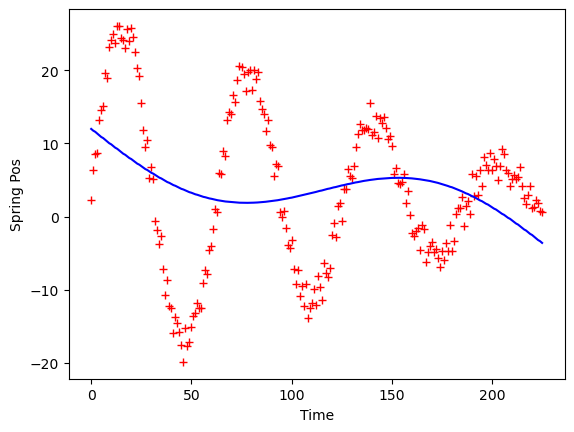

In [50]:
plt.plot(y2.x, y2.y, 'r+')
plt.plot(y2.x, yhat, 'b-')  # yhat = y2.x*beta[0]
plt.ylabel('Spring Pos')
plt.xlabel('Time')

# polynomial features

In [51]:
X=df[['x1']].values
y=df[['SpringPos']].values

In [52]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 16)   
X_poly = poly_transformer.fit_transform(X)

# Fit the model and estimate the loss:

In [54]:
lr = LinearRegression()
lr.fit(X_poly, y)
print("Intercept=", lr.intercept_, "Beta = ", lr.coef_)
yhat=lr.predict(X_poly)
loss = SSE(y, yhat)
print("SSE = ", loss)

Intercept= [2.52889051] Beta =  [[ 0.00000000e+00 -1.04183054e+02 -9.34262851e+01  3.24364747e+01
  -8.79900101e+01 -4.32155842e+01  1.55975256e+02  5.09207528e+01
  -1.69074150e+02 -1.98078476e+02 -1.06099474e+02 -3.41595565e+01
  -7.12099306e+00 -9.73579781e-01 -8.46421273e-02 -4.25773398e-03
  -9.45640913e-05]]
SSE =  459.1229177302257


Text(0.5, 0, 'Time')

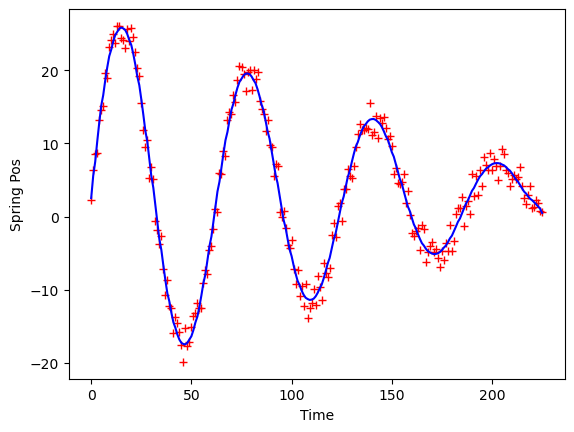

In [55]:
plt.plot(y2.x, y2.y, 'r+')
plt.plot(y2.x, yhat, 'b-')  # yhat = y2.x*beta[0]
plt.ylabel('Spring Pos')
plt.xlabel('Time')